In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split as tt
from sklearn.preprocessing import LabelEncoder as le
from sklearn.metrics import confusion_matrix as cm,accuracy_score as acc , classification_report as cr

In [2]:
data=pd.read_csv(r"D:\ml lab data set\car_data.csv")


In [3]:
data.head()



,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


InvalidIndexError: (slice(None, None, None), 0)

In [6]:
x=data.drop(columns=["User ID","Purchased"])
l=le()
x['Gender']=l.fit_transform(x["Gender"])
y=data['Purchased']

In [18]:
print(x.iloc[:,0])

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    0
997    0
998    0
999    0
Name: Gender, Length: 1000, dtype: int32


In [5]:
xtrain,xtest,ytrain,ytest=tt(x,y,test_size=0.2,random_state=43)

In [6]:
from sklearn.tree import DecisionTreeClassifier as DT,plot_tree as TR
mod=DT()

In [7]:
mod.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [8]:
yprd=mod.predict(xtest)

In [9]:
cm=cm(ytest,yprd)

ac=acc(ytest,yprd)
cr=cr(ytest,yprd)

In [10]:
print(ac,cr,cm)

0.865               precision    recall  f1-score   support

           0       0.89      0.90      0.89       125
           1       0.82      0.81      0.82        75

    accuracy                           0.86       200
   macro avg       0.86      0.85      0.86       200
weighted avg       0.86      0.86      0.86       200
 [[112  13]
 [ 14  61]]


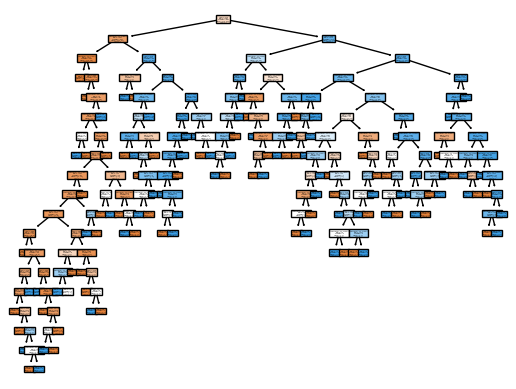

In [11]:
TR(mod,filled=True,feature_names=x.columns,class_names=['0','1'])
import matplotlib.pyplot as pt
pt.show()

array([[<Axes: title={'center': 'User ID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'AnnualSalary'}>,
        <Axes: title={'center': 'Purchased'}>]], dtype=object)

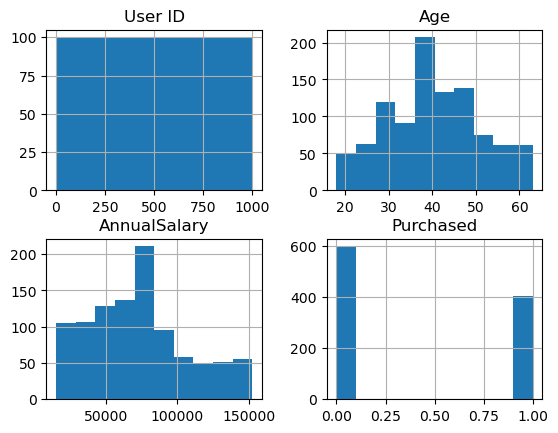

In [63]:
data.hist()

In [20]:
import seaborn as sns

In [21]:
import matplotlib.pyplot as pt

<Axes: xlabel='count', ylabel='Purchased'>

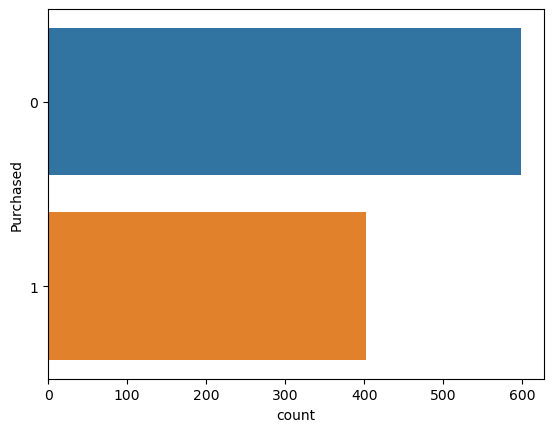

In [28]:
sns.countplot(x=data['Purchased'])


<Axes: xlabel='Gender', ylabel='count'>

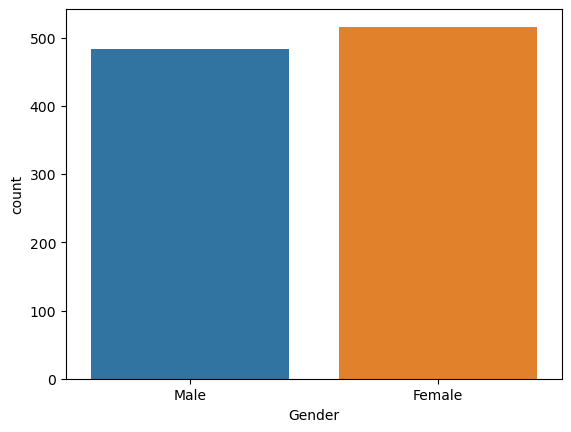

In [29]:
sns.countplot(x=data['Gender'])

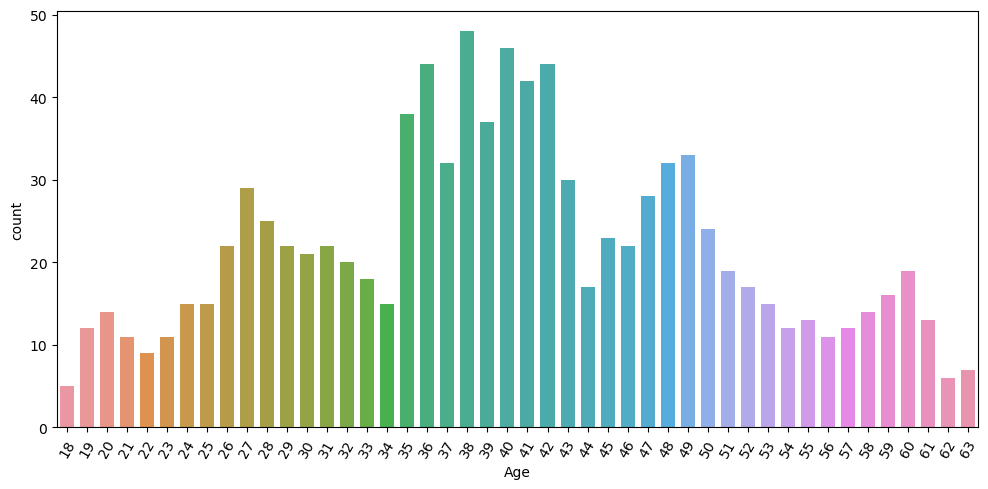

In [51]:
pt.figure(figsize=(10,5))
sns.countplot(x=data['Age'],data=data,width=0.7)
pt.xticks(rotation=60)
pt.tight_layout()
pt.show()

<Axes: >

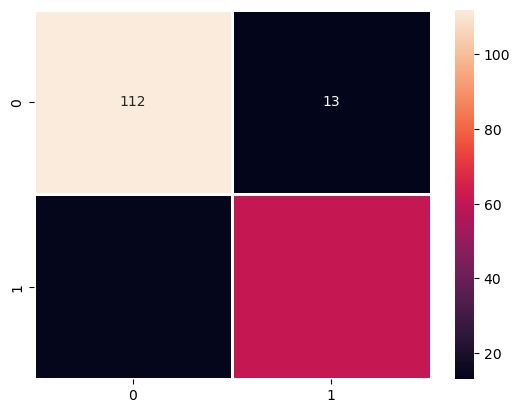

In [33]:
sns.heatmap(cm,annot=True,fmt='d'  linewidths=2)

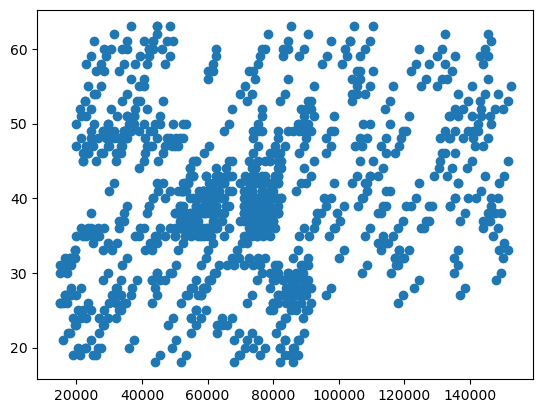

In [58]:
import numpy as np
pt.scatter(data['AnnualSalary'],data['Age'])
m, b = np.polyfit(data['AnnualSalary'],data['Age'], 1)
pt.show()